In [1]:
### CONSTRAIN_DM_NS_MODELS.IPYNB -- Compare neutron star mass-radius relations with different DM fractions to observed mass-radius measurements

In [2]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d

In [3]:
# download the ns-struc-dm repository

! git clone https://github.com/kunalkishanmehta/ns-struc-dm.git

Cloning into 'ns-struc-dm'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 220 (delta 129), reused 15 (delta 1), pack-reused 4
Receiving objects: 100% (220/220), 4.95 MiB | 7.34 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [4]:
# load neutron star observations

j0030 = np.genfromtxt('ns-struc-dm/etc/Miller_J0030_three-spot.csv',names=True,delimiter=',',dtype=None) # psr j0030 mass and radius
j0740 = np.genfromtxt('ns-struc-dm/etc/Miller_J0740_nominal-XMM.csv',names=True,delimiter=',',dtype=None) # psr j0740 mass and radius

gw170817 = np.genfromtxt('ns-struc-dm/etc/LVC_GW170817_PhenomPNRT-lo.csv',names=True,delimiter=',',dtype=None) # gw170817 masses and tidal deformabilities
gw190425 = np.genfromtxt('ns-struc-dm/etc/LVC_GW190425_PhenomPNRT-hi.csv',names=True,delimiter=',',dtype=None) # gw190425 masses and tidal deformabilities

In [5]:
# convert tidal deformability to radius using a fit based on many different equations of state

c = 2.998e10 # speed of light
G = 6.6743e-9 # Newton's constant
Msun = 1.988435e33 # solar mass

def C(L): # fit to compactness Gm/c^2 R in terms of tidal deformability from arxiv:1608.02582

  return 0.360 - 0.0355*np.log(L) + 0.001056*np.log(L)**2

R1_gw170817 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw170817['m1'],gw170817['Lambda1'])]
R2_gw170817 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw170817['m2'],gw170817['Lambda2'])]

R1_gw190425 = [1e-4*(G/c**2)*m1*Msun/C(L1) for m1,L1 in zip(gw190425['m1'],gw190425['Lambda1'])]
R2_gw190425 = [1e-4*(G/c**2)*m2*Msun/C(L2) for m2,L2 in zip(gw190425['m2'],gw190425['Lambda2'])]

In [6]:
# load mass-radius tables for neutron stars containing dark matter

sly_dm = np.genfromtxt('ns-struc-dm/macro-sly.csv',names=True,delimiter=',',dtype=None) # sly equation of state
mpa1_dm = np.genfromtxt('ns-struc-dm/macro-mpa1.csv',names=True,delimiter=',',dtype=None) # mpa1 equation of state

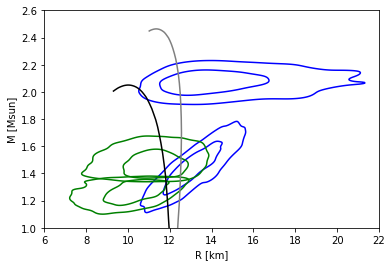

In [7]:
# overlay the mass-radius relations for the equations of state on top of the mass-radius measurements

sns.kdeplot(x=j0030['R'],y=j0030['m'],weights=j0030['likelihood']/np.sum(j0030['likelihood']),levels=[0.1,0.5],color='b')
sns.kdeplot(x=j0740['R'],y=j0740['m'],weights=j0740['likelihood']/np.sum(j0740['likelihood']),levels=[0.1,0.5],color='b')

sns.kdeplot(x=R1_gw170817,y=gw170817['m1'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')
sns.kdeplot(x=R2_gw170817,y=gw170817['m2'],weights=gw170817['likelihood']/np.sum(gw170817['likelihood']),levels=[0.1,0.5],color='g')

#sns.kdeplot(x=R1_gw190425,y=gw190425['m1'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g') # skip gw190425 for now because it's so uninformative
#sns.kdeplot(x=R2_gw190425,y=gw190425['m2'],weights=gw190425['likelihood']/np.sum(gw190425['likelihood']),levels=[0.1,0.5],color='g')

plt.plot(sly_dm['R'][::48],sly_dm['Mg'][::48],c='k')
#plt.plot(sly_dm['R'][10::48],sly_dm['Mg'][10::48],c='k',ls='--') # replace these with constant DM fraction curves
#plt.plot(sly_dm['R'][20::48],sly_dm['Mg'][20::48],c='k',ls='--')
#plt.plot(sly_dm['R'][30::48],sly_dm['Mg'][30::48],c='k',ls='--')
#plt.plot(sly_dm['R'][40::48],sly_dm['Mg'][40::48],c='k',ls='--')

plt.plot(mpa1_dm['R'][::48],mpa1_dm['Mg'][::48],c='grey')
#plt.plot(mpa1_dm['R'][10::48],mpa1_dm['Mg'][10::48],c='grey',ls='--') # replace these with constant DM fraction curves
#plt.plot(mpa1_dm['R'][20::48],mpa1_dm['Mg'][20::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][30::48],mpa1_dm['Mg'][30::48],c='grey',ls='--')
#plt.plot(mpa1_dm['R'][40::48],mpa1_dm['Mg'][40::48],c='grey',ls='--')

plt.xlim(6.,22.)
plt.ylim(1.,2.6)
plt.xlabel("R [km]")
plt.ylabel("M [Msun]")
plt.show()

In [8]:
# to quantify which equation of state and dark matter fraction is preferred by the data, compute Bayesian evidences; start by interpolating mass-radius measurements with a Gaussian kernel density estimate

j0030_kde = gaussian_kde(np.vstack((j0030['R'],j0030['m'])),weights=j0030['likelihood']/np.sum(j0030['likelihood'])) # returns a function that gives likelihood as a function of mass and radius
j0740_kde = gaussian_kde(np.vstack((j0740['R'],j0740['m'])),weights=j0740['likelihood']/np.sum(j0740['likelihood']))

gw170817_kde1 = gaussian_kde(np.vstack((R1_gw170817,gw170817['m1'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))
gw170817_kde2 = gaussian_kde(np.vstack((R2_gw170817,gw170817['m2'])),weights=gw170817['likelihood']/np.sum(gw170817['likelihood']))

gw190425_kde1 = gaussian_kde(np.vstack((R1_gw190425,gw190425['m1'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))
gw190425_kde2 = gaussian_kde(np.vstack((R2_gw190425,gw190425['m2'])),weights=gw190425['likelihood']/np.sum(gw190425['likelihood']))

In [9]:
# now interpolate equation of state's mass-radius relation, up to maximum mass, and calculate Bayesian evidence for that equation of state

mmax = max(sly_dm['Mg'][::48])
pos = list(sly_dm['Mg'][::48]).index(mmax)
radius = interp1d(sly_dm['Mg'][::48][:pos+1],sly_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like = j0030_like*j0740_like # evidence for equation of state from psr observations
print(like)

gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
print(like)

0.0006018056438090284
0.008829536132493746


In [10]:
# repeat for another equation of state; can also do non-zero dark matter fraction mass-radius relation

mmax = max(mpa1_dm['Mg'][::48])
pos = list(mpa1_dm['Mg'][::48]).index(mmax)
radius = interp1d(mpa1_dm['Mg'][::48][:pos+1],mpa1_dm['R'][::48][:pos+1],bounds_error=False,fill_value = 0.) # returns a function that gives radius as a function of mass

# evidence = integral[ likelihood(observation | m,R) * probability(m,R | eos) dm dR ], where likelihood is the kde and probability is a delta function in R(m) for the eos
# evidence_tot = evidence1*evidence2*...
# use Monte Carlo approximation of integral: integral[... dm] = sum[... for m in uniform_m]/num_m

j0030_like = np.sum([j0030_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0030 mass and radius, given equation of state
j0740_like = np.sum([j0740_kde((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of psr j0740 mass and radius, given equation of state
like = j0030_like*j0740_like # evidence for equation of state from psr observations
print(like)

gw170817_like1 = np.sum([gw170817_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 primary mass and radius, given equation of state
gw170817_like2 = np.sum([gw170817_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw170817 secondary mass and radius, given equation of state
#gw190425_like1 = np.sum([gw190425_kde1((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 primary mass and radius, given equation of state
#gw190425_like2 = np.sum([gw190425_kde2((radius(m),m)) for m in np.linspace(1.,3.,100)])/100 # likelihood of gw190425 secondary mass and radius, given equation of state
like = gw170817_like1*gw170817_like2#*gw190425_like1*gw190425_like2 # evidence for equation of state from gw observations # skip gw190425 for now because it's so uninformative
print(like)

0.012332629521939253
0.0024179303674999038


In [11]:
# from this, conclude that pulsar measurements favour mpa1 over sly by factor of 0.0123/0.0006 = 20, but gw measurements favor sly over mpa1 by factor of 0.0088/0.0024 = 4; can do the same calculation for zero vs non-zero DM fraction